<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/202401/t41_Aula7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aprendizagem Não Supervisionada
Aula 7 - 1a Parte - Clusterização - K-Means

In [31]:
# Carga de bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

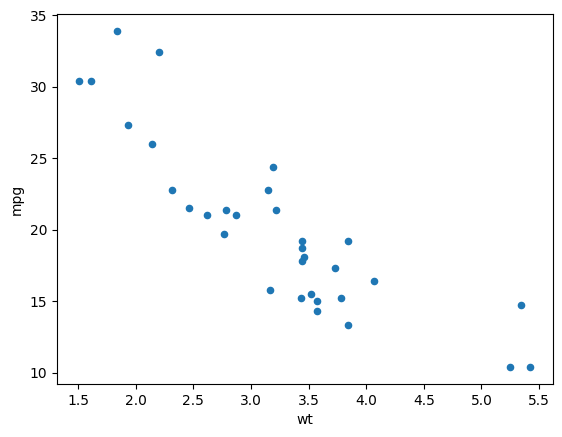

In [3]:
df.plot.scatter(x="wt", y="mpg")

In [38]:
# Tratamento de dados - normalização/ajuste de escala min-max
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg01'], df['wt01'] = scaler.fit_transform(df[['mpg']]), scaler.fit_transform(df[['wt']])

In [40]:
# Execução do K-Means
k = KMeans(n_clusters=4, random_state=1).fit(df[['mpg01','wt01']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

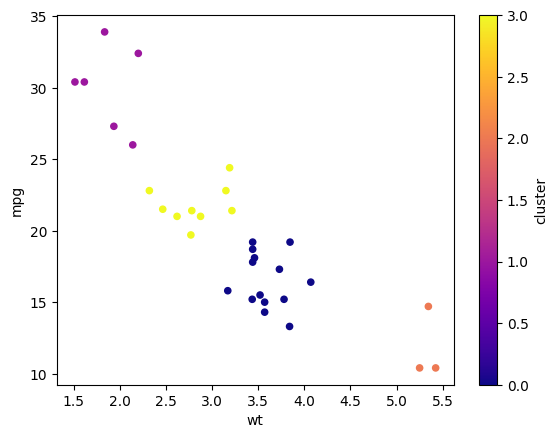

In [41]:
df['cluster'] = k.labels_
df.plot.scatter(x="wt", y="mpg", c='cluster', colormap='plasma')

### Aprendizagem Supervisionada
Aula 7 - 2a Parte - Outros Algoritmos


In [86]:
# 0. Carga de bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [87]:
# 1. Carga de dados
dfTit = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

# 2. Transformações de variáveis (feature engineering)
# Criação de variável Dummy
dummy_sex = pd.get_dummies(dfTit['Sex'])
dfTit['SexFemale'] = dummy_sex['female']

dummy_pclass = pd.get_dummies(dfTit['Pclass'], prefix= "Classe")
dfTit['Classe_1'] = dummy_pclass['Classe_1']
dfTit['Classe_2'] = dummy_pclass['Classe_2']

# Preenchimento de nulos para idades
ageMed = dfTit['Age'].mean()
dfTit['AgeNullTrat'] = dfTit['Age'].fillna(ageMed)

# 3. Separação de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(dfTit[['SexFemale','Classe_1', 'Classe_2', 'AgeNullTrat']], dfTit['Survived'], test_size=0.25, random_state=1)

# 4. Construir modelo de árvore
#modTit = tree.DecisionTreeClassifier()
# 4. Construir modelo RandomForest
#modTit = RandomForestClassifier(random_state=2, n_estimators=2000)
# RandomForest Variable Importance
#modTit.feature_importances
# 4. Construir modelo SVM
modTit = svm.SVC()

modTit.fit(x_treino, y_treino)

SVC()

In [88]:
# 5. Previsão em teste
y_prev = modTit.predict(x_teste)

# Métricas de erro de classificadores
print(accuracy_score(y_teste, y_prev))
print(precision_score(y_teste, y_prev))
print(recall_score(y_teste, y_prev))

0.5650224215246636
0.42857142857142855
0.06315789473684211


# Aula 7 - 3a Parte - AutoML (automatização de etapas de ML)

In [89]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.0 MB/

In [1]:
# Importar biblioteca pycaret
from pycaret.classification import *
import pandas as pd

In [2]:
# 1. Carga de dados
dfTit = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')


In [3]:
# 2. Configuração do pycaret
s = setup(dfTit, target='Survived')

,Description,Value
0,Session id,1394
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,79.5%


/usr/local/lib/python3.10/dist-packages/pycaret/internal/metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [4]:
# Execução e comparação de modelos
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7930,0.0000,0.6362,0.7863,0.6988,0.5450,0.5552,1.1280
ridge,Ridge Classifier,0.7192,0.0000,0.3558,0.8040,0.4884,0.3355,0.3896,0.2220
et,Extra Trees Classifier,0.6436,0.0000,0.1005,0.6850,0.1707,0.0974,0.1664,0.3440
nb,Naive Bayes,0.6405,0.0000,0.1047,0.6900,0.1803,0.0934,0.1593,0.1470
knn,K Neighbors Classifier,0.6198,0.0000,0.4101,0.5147,0.4539,0.1679,0.1723,0.1500
rf,Random Forest Classifier,0.6180,0.0000,0.0043,0.1000,0.0083,0.0054,0.0167,0.2840
lda,Linear Discriminant Analysis,0.6180,0.0000,0.0261,0.0545,0.0353,0.0149,0.0168,0.1560
dt,Decision Tree Classifier,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1480
ada,Ada Boost Classifier,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1400
gbc,Gradient Boosting Classifier,0.6164,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2160


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [5]:
# Detalhamento melhor modelo
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1394, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [8]:
# Análise do melhor modelo
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…